In [1]:
import torch, os
from torch import nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
dataset = load_breast_cancer()
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

# Checking null value in data

In [2]:
print(df.columns.values)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'
 'target']


In [3]:
print(df.isnull().sum().values)
print(df.isna().sum().values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# visualize using histogram grid
where red is malignant and blue is benign
There are some feature that is not too related to the tumor target

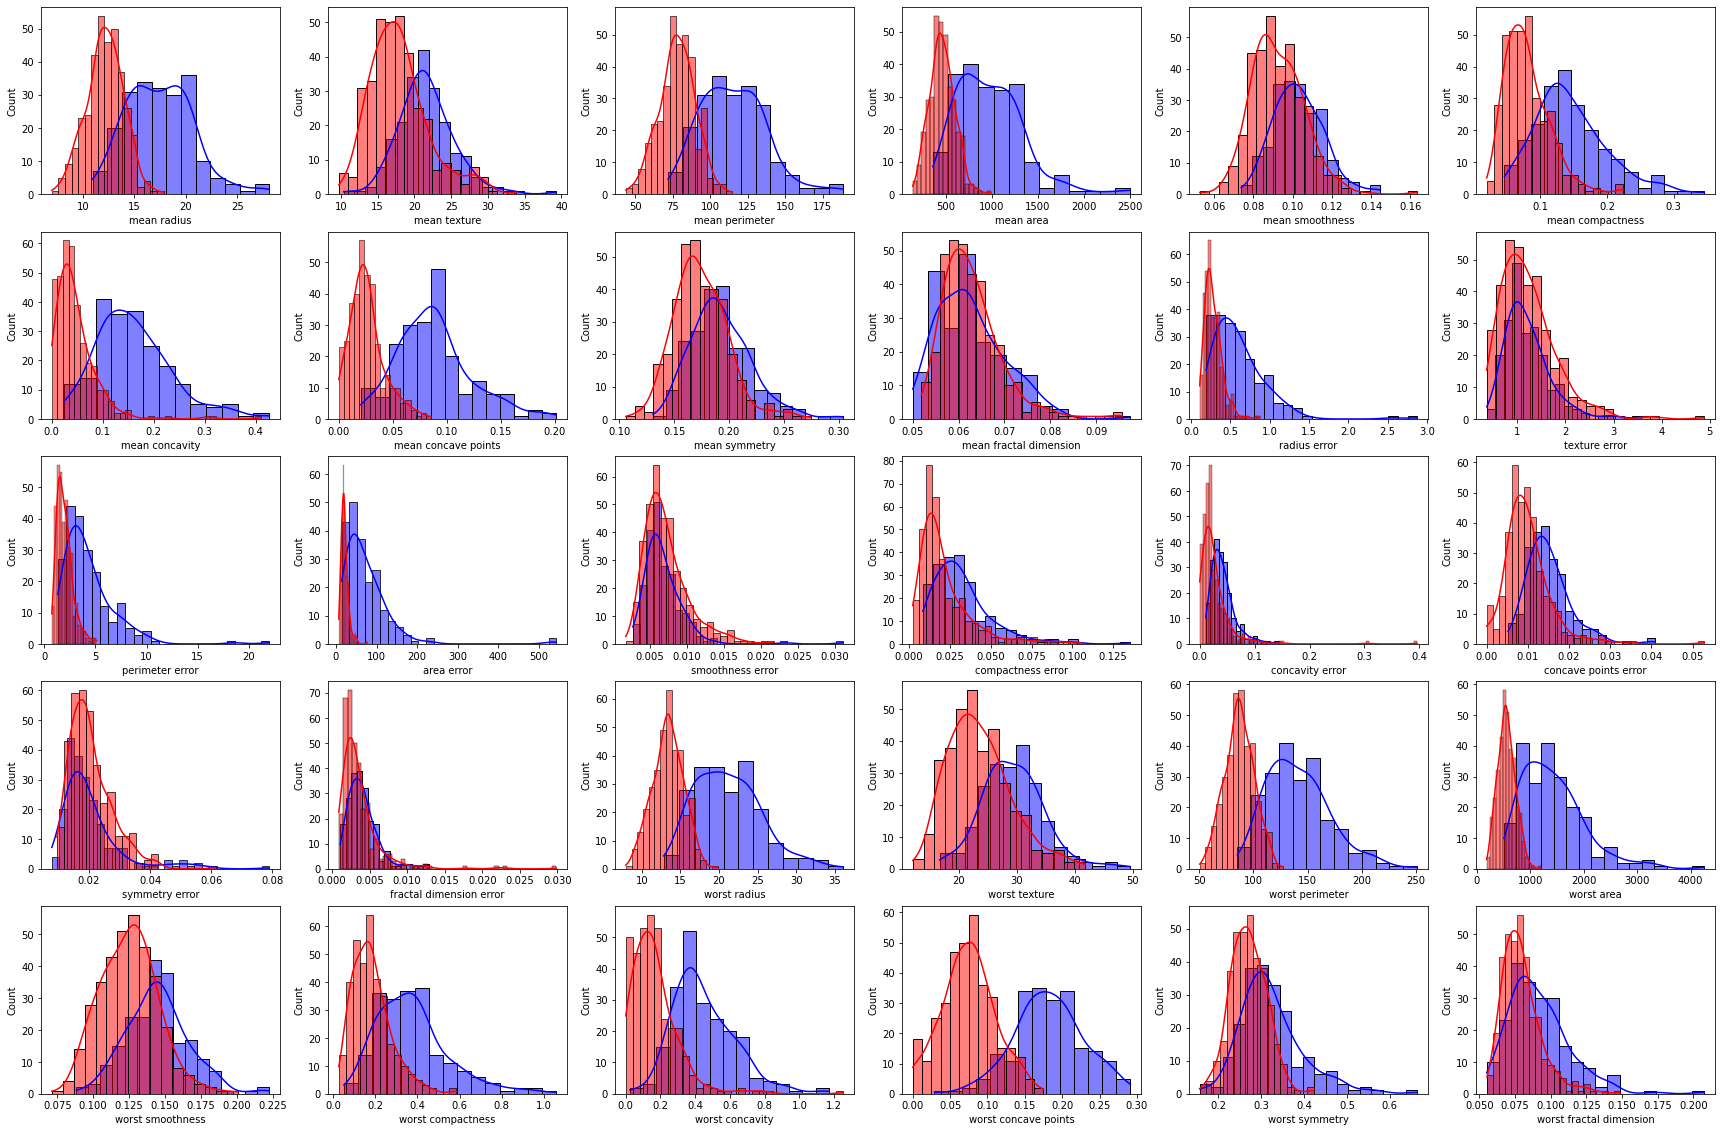

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
figs, axs = plt.subplots(5,6,figsize=(30,20))
for index, columns_name in enumerate(df.drop(columns='target').columns.values):
    sns.histplot(ax = axs[index//6, index%6] ,data=df[df['target']==0], x=columns_name, color="blue", kde=True)
    sns.histplot(ax = axs[index//6, index%6] ,data=df[df['target']==1], x=columns_name, color="red", kde=True)

Using correlated analysis, there are multiple parameter that is strongly correlated such as mean radius-perimeter-area

<AxesSubplot:>

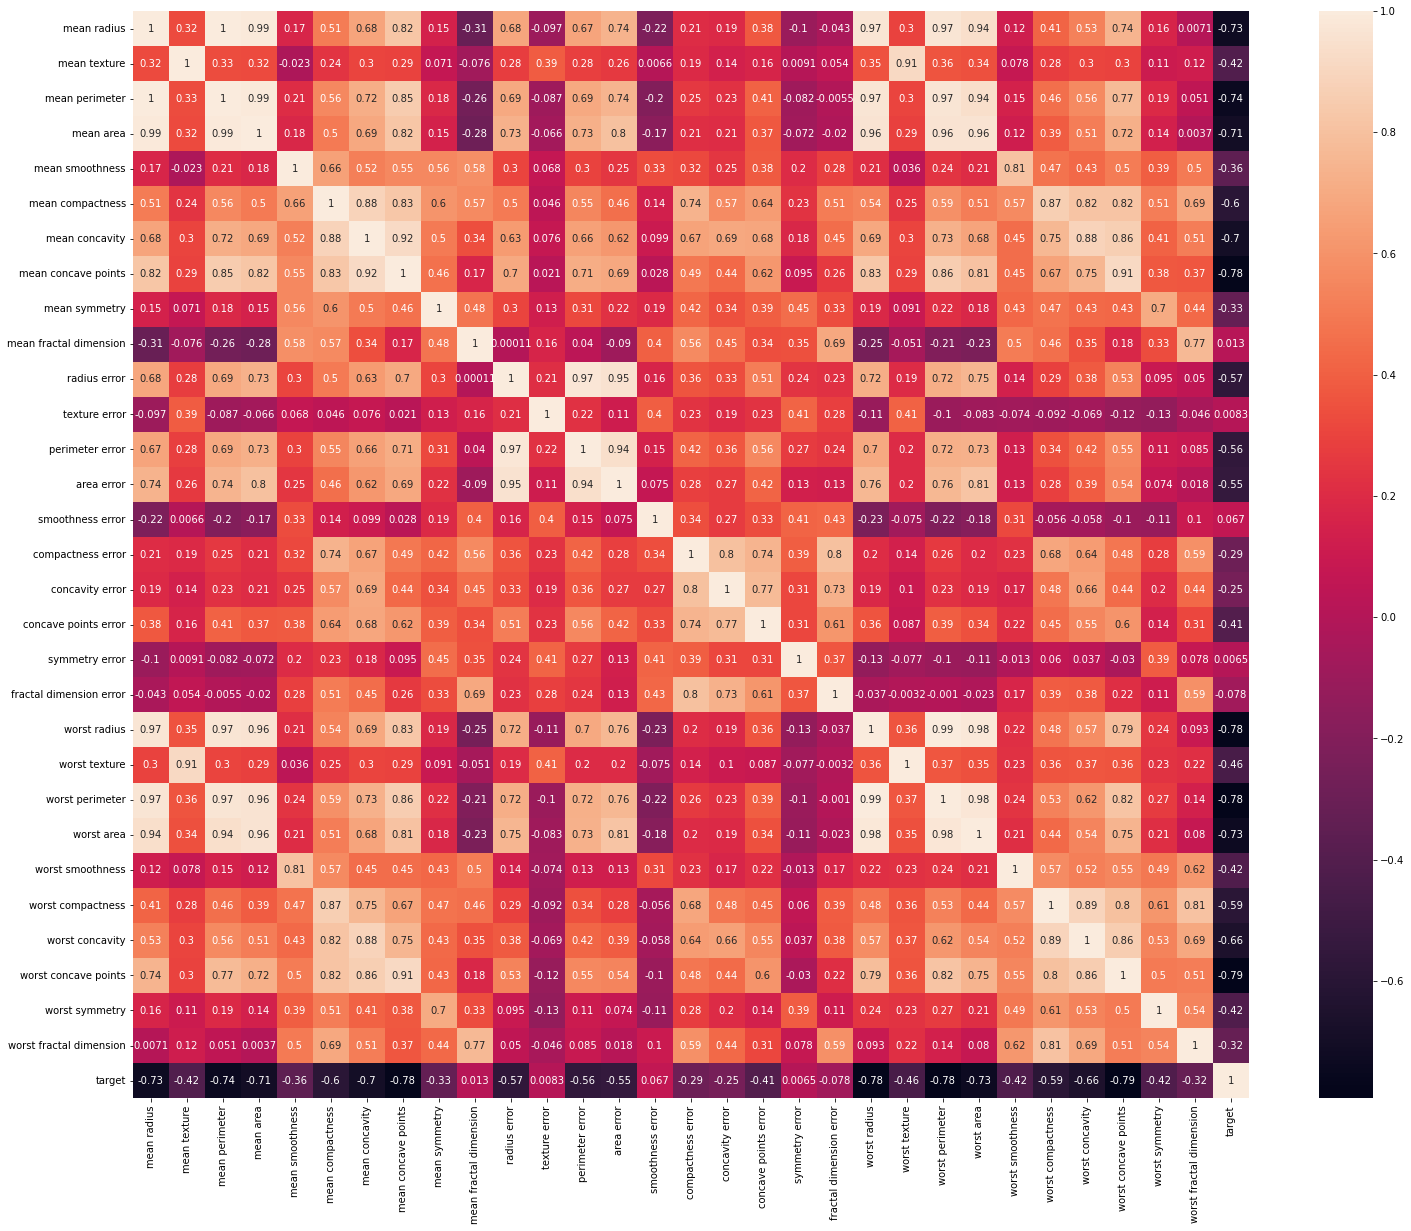

In [7]:
fig, axs = plt.subplots(figsize=(25,20)) 
sns.heatmap(df.corr(),ax = axs,annot=True)

Or correlated between feature and target in barplot show some feature has no association, some feature has strongly association.  

<AxesSubplot:>

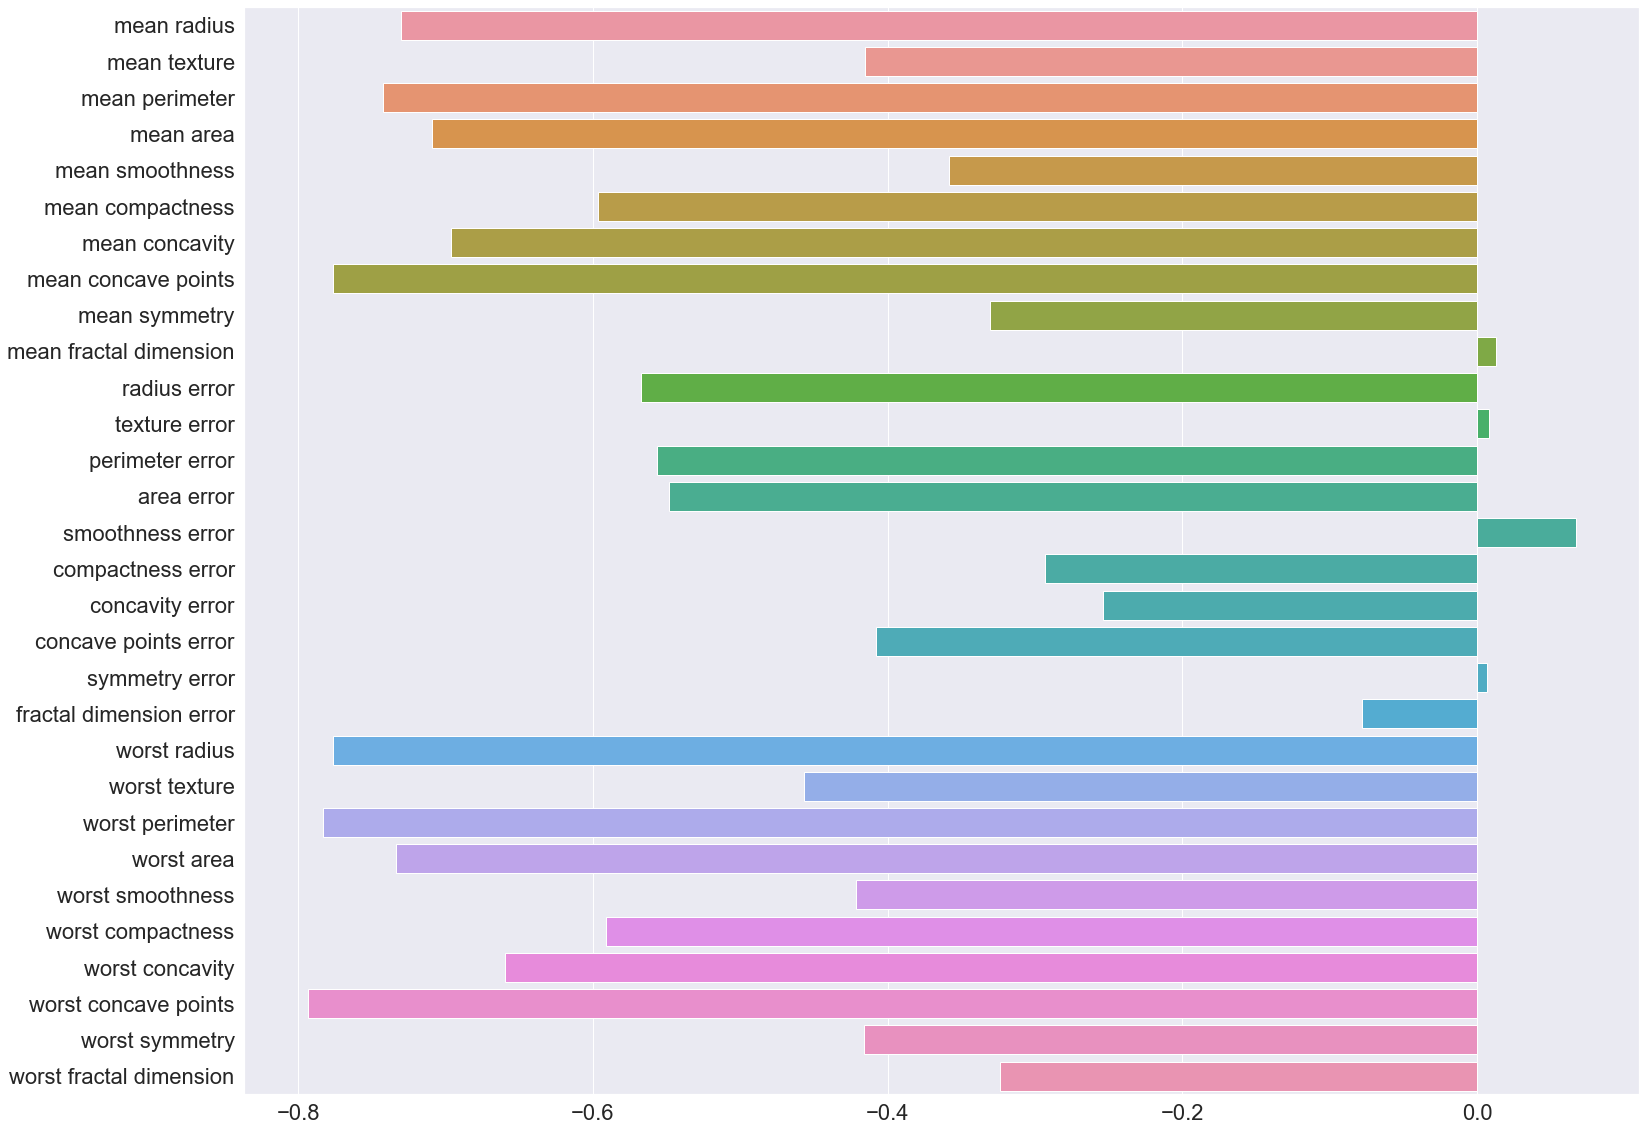

In [25]:
fig, axs = plt.subplots(figsize=(25,20)) 
sns.set(font_scale=3)
sns.barplot(x=df.corr()['target'][:-1].values,
            y=df.columns[:-1],
            ax = axs)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(df.drop(columns='target'),df['target'],test_size=0.2,random_state=136)

In [123]:
import sklearn.metrics

<function sklearn.metrics._scorer._passthrough_scorer(estimator, *args, **kwargs)>

In [119]:
# Logistic Regression
from sklearn.metrics import f1_score
df_score = []

from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(max_iter=1000)
LRmodel.fit(X_train,y_train)
df_score.append([LRmodel.score(X_train,y_train),
                 LRmodel.score(X_test,y_test), 
                 f1_score(LRmodel.predict(X_train),y_train),
                 f1_score(LRmodel.predict(X_test),y_test)])

from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(max_depth=5,max_leaf_nodes=5)
RFmodel.fit(X_train,y_train)
df_score.append([RFmodel.score(X_train,y_train),
                 RFmodel.score(X_test,y_test), 
                 f1_score(RFmodel.predict(X_train),y_train),
                 f1_score(RFmodel.predict(X_test),y_test)])

from sklearn.naive_bayes import GaussianNB
GNBmodel = GaussianNB()
GNBmodel.fit(X_train,y_train)
df_score.append([GNBmodel.score(X_train,y_train),
                 GNBmodel.score(X_test,y_test), 
                 f1_score(GNBmodel.predict(X_train),y_train),
                 f1_score(GNBmodel.predict(X_test),y_test)])

from sklearn.tree import DecisionTreeClassifier
DTmodel = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=5)
DTmodel.fit(X_train,y_train)
df_score.append([DTmodel.score(X_train,y_train),
                 DTmodel.score(X_test,y_test), 
                 f1_score(DTmodel.predict(X_train),y_train),
                 f1_score(DTmodel.predict(X_test),y_test)])

from sklearn.ensemble import GradientBoostingClassifier
XGBmodel = GradientBoostingClassifier(max_leaf_nodes=2)
XGBmodel.fit(X_train,y_train)
df_score.append([XGBmodel.score(X_train,y_train),
                 XGBmodel.score(X_test,y_test), 
                 f1_score(XGBmodel.predict(X_train),y_train),
                 f1_score(XGBmodel.predict(X_test),y_test)])

from sklearn.ensemble import VotingClassifier
er = VotingClassifier([('LR', LRmodel), 
                    ('RF', RFmodel),
                    ('GNB', GNBmodel),
                    ('DT', DTmodel),
                    ('XGB', XGBmodel)])

er.fit(X_train,y_train)
df_score.append([er.score(X_train,y_train),
                 er.score(X_test,y_test), 
                 f1_score(er.predict(X_train),y_train),
                 f1_score(er.predict(X_test),y_test)])
index_val = ['Logistic Regression','Random forest','Gaussian','Decision Tree','XGDBoost','Voting Classifier']

In [120]:
df_score = pd.DataFrame(df_score,columns=['Train Accuracy','Test Accuracy','F1 score train','F1 score test'],index=index_val)

# Plotting the accuracy of the system

(0.9, 1.0)

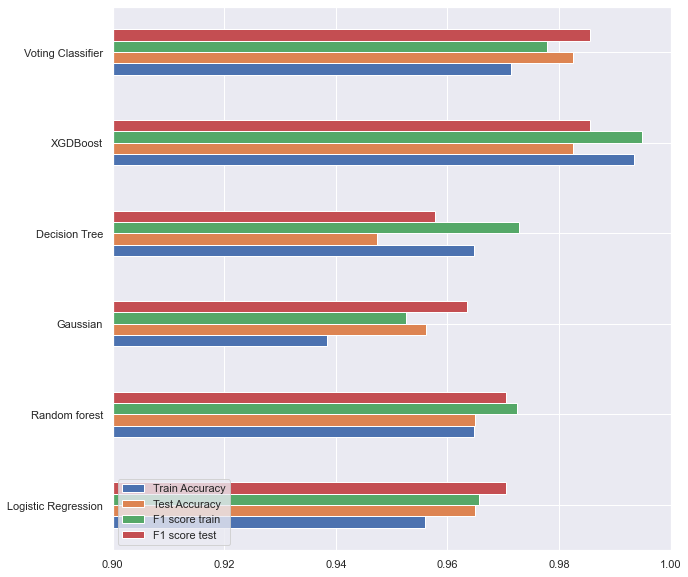

In [121]:
fig, axs = plt.subplots(figsize=(10,10)) 
df_score.plot(kind='barh',ax=axs).legend(loc=3)
axs.set_xlim([0.9,1])